# Đồ án cuối kì 

## Giảng viên hướng dẫn: Trần Trung Kiên

## Trợ giảng: Cô Phan Thị Phương Uyên

---

## Sinh viên thực hiện

  ### MSSV: 1712525

  ### Họ và tên: Nguyễn Ngọc Minh Khánh

# Các thư viện cần thiết

In [1]:
import pandas as pd
import warnings
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = 15, 7
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15

---

# Lấy dữ liệu

Dữ liệu được dùng trong đồ án cuối kì này là file winemag-data-130k-v2.csv. Đây là dữ liệu về đánh giá điểm và nhận xét về chất lượng của các loại rượu thuộc nhiều khu vực, nhiều quốc gia. Dữ liệu được lấy từ dataset "wine-reviews" trên kaggle. Dữ liệu gốc có thể lấy [tại đây](https://www.kaggle.com/zynicide/wine-reviews) 

---

# Khám phá dữ liệu

## Đọc dữ liệu từ file csv vào dataframe

In [12]:
wine_df = pd.read_csv('winemag-data-130k-v2.csv')
wine_df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


## Số lượng dòng và cột của dữ liệu

In [13]:
num_rows = wine_df.shape[0]
num_cols = wine_df.shape[1]
print('Số lượng dòng: ', num_rows)
print('Số lượng cột: ', num_cols)

Số lượng dòng:  129971
Số lượng cột:  14


**Giải thích**:

Mỗi dòng có là chứa 1 phần nhận xét (description) và đánh giá điểm (point) của 1 tác giả cho 1 loại rượu cụ thể. Nên cũng có thể có 1 loại rượu được đánh giá bởi nhiều tác giả khác nhau.

1 loại rượu thì có thể được phân biệt với nhau nếu khác nhau về 1 trong những yếu tố như loại nho làm rượu, nhà sản suất, năm sản suất, vùng sản suất. Nên để phân biệt giữa các loại rượu với nhau ta dùng phần `title`.

## Mô tả ý nghĩa của mỗi dòng và cột

Mỗi dòng là nhận xét, đánh giá điểm số và các thông tin khác của 1 loại rượu ở 1 vùng cụ thể.

Dưới đây là phần mô tả của tác giả về ý nghĩa của các cột trong file winemag-data-130k-v2.csv:

+ **Points**: the number of points WineEnthusiast rated the wine on a scale of 1-100 (though they say they only post reviews for wines that score >=80)
+ **Title**: the title of the wine review, which often contains the vintage if you're interested in extracting that feature
+ **Variety**: the type of grapes used to make the wine (ie Pinot Noir)
+ **Description**: a few sentences from a sommelier describing the wine's taste, smell, look, feel, etc.
+ **Country**: the country that the wine is from
+ **Province**: the province or state that the wine is from
+ **Region 1**: the wine growing area in a province or state (ie Napa)
+ **Region 2**: sometimes there are more specific regions specified within a wine growing area (ie Rutherford inside the Napa Valley), but this value can sometimes be blank
+ **Winery**: the winery that made the wine
+ **Designation**: the vineyard within the winery where the grapes that made the wine are from
+ **Price**: the cost for a bottle of the wine
+ **Taster Name**: name of the person who tasted and reviewed the wine
+ **Taster Twitter Handle**: Twitter handle for the person who tasted ane reviewed the wine

## Kiểu dữ liệu và số lượng giá trị khác rỗng của mỗi cột

In [14]:
wine_df.drop(columns='Unnamed: 0', inplace = True)
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


Các cột dạng categorical là: country, description, designation, province, region_1, region_2, taster_name, taster_twitter_handle, title, variety, winery.


Các cột còn là là point và price mang giá trị thuộc numerical

In [15]:
# Lưu lại các cột categorical
cat_cols_name = wine_df.columns[wine_df.dtypes=='object']
# Biến cat_cols_nunique chứa số lượng giá trị distinct của mỗi biến categorical
cat_cols_nunique = wine_df[cat_cols_name].nunique()
# Biến cal_cols_name là mảng 2 chiều với mỗi chiều chứa mảng các giá trị distinct ứng với mỗi biến categorical
cat_cols_unique = [wine_df[cols_name].unique() for cols_name in cat_cols_name]
data = {'cat_cols_nunique': cat_cols_nunique, 'cat_cols_unique':cat_cols_unique}
# Tạo dataframe
df_cat_cols = pd.DataFrame(data, columns = ['cat_cols_nunique', 'cat_cols_unique'])
df_cat_cols

,cat_cols_nunique,cat_cols_unique
country,43,"[Italy, Portugal, US, Spain, France, Germany, ..."
description,119955,"[Aromas include tropical fruit, broom, brimsto..."
designation,37979,"[Vulkà Bianco, Avidagos, nan, Reserve Late Har..."
province,425,"[Sicily & Sardinia, Douro, Oregon, Michigan, N..."
region_1,1229,"[Etna, nan, Willamette Valley, Lake Michigan S..."
region_2,17,"[nan, Willamette Valley, Napa, Sonoma, Central..."
taster_name,19,"[Kerin O’Keefe, Roger Voss, Paul Gregutt, Alex..."
taster_twitter_handle,15,"[@kerinokeefe, @vossroger, @paulgwine , nan, @..."
title,118840,"[Nicosia 2013 Vulkà Bianco (Etna), Quinta dos..."
variety,707,"[White Blend, Portuguese Red, Pinot Gris, Ries..."


## Số lượng giá trị thiếu cũng mỗi cột

In [16]:
wine_df.isnull().sum()

country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

## Làm rõ hơn ý nghĩa của các cột country, province, region_1, region_2, title


Theo mô tả của tác giả: 
- **Country**: the country that the wine is from
- **Province**: the province or state that the wine is from
- **Region 1**: the wine growing area in a province or state (ie Napa)
- **Region 2**: sometimes there are more specific regions specified within a wine growing area (ie Rutherford inside the Napa -Valley), but this value can sometimes be blank
+ **Title**: the title of the wine review, which often contains the vintage if you're interested in extracting that feature

Như vậy, country là đơn vị lớn nhất chỉ 1 quốc gia, country thì gồm nhiều province. Province thì bao gồm nhiều region_1, còn region_1 thì bao gồm nhiều region_2 (vùng, địa điểm cụ thể thuộc về region_1), có nhiều mẫu giá trị ở region_2 giống với region_1 hoặc là không có giá trị. Ở đây việc kiểm tra các Province có bị overlap với nhau hay không cũng không mang nhiều ý nghĩa ( tức là 1 region vừa thuộc province này vừa thuộc province kia ).

**Title** theo như nhận thấy thì chứa rất nhiều thông tin, bao gồm: loại nho để làm rượu, nhà sản suất, và mình nghĩ thời gian có trong title là thời gian sản suất rượu và cũng dùng để phân biệt loại rượu nếu chúng được làm từ cùng loại nho, nhà sản suất.


---

# Tiền xử lí dữ liệu trước khi thực hiện các bước khám phá dữ liệu kế tiếp

## Xóa các thuộc tính không mang nhiều ý nghĩa hoặc các giá trị gây khó trong phân tích

 - Thuộc tính designation: có số lượng các giá trị khác nhau( không bao gồm NaN) là rất lớn.Những thuộc tính này cũng không mang lại nhiều ý nghĩa cho việc phân tích nên ta đơn giản là xóa thuộc tính này đi.
 - Thuộc tính taster_twitter_handle: thuộc tính này không mang ý nghĩa trong bài phân tích nên ta đơn giản xóa đi.

In [17]:
print("Số lượng các giá trị khác nhau của thuộc tính designation là: ",  wine_df['designation'].nunique())

Số lượng các giá trị khác nhau của thuộc tính designation là:  37979


In [18]:
wine_df.drop(columns=['designation', 'taster_twitter_handle'], inplace = True)

 Nếu kiểm tra lại trong dữ liệu thì chỉ có 1 mẫu thuộc về Ai Cập và giá trị ở price của nó cũng là NaN. Nên ở đây ta không biết nên cập nhật giá của loại rượu ở quốc gia này như thế nào nên để đơn giản cho việc xử lí bên dưới ta xóa luôn dòng thuộc về Ai Cập.

In [19]:
wine_df[wine_df['country']=='Egypt']

,country,description,points,price,province,region_1,region_2,taster_name,title,variety,winery
110246,Egypt,"Ripe pear, apple and tropical fruit in the nos...",84,NaN,Egypt,NaN,NaN,Susan Kostrzewa,Sahara Vineyards 2008 Caspar Blanc de Noirs Gr...,Grenache,Sahara Vineyards


In [20]:
wine_df = wine_df[wine_df['country']!='Egypt'].reset_index(drop = True)
num_rows -= 1 # cập nhật lại giá trị

## Xử lí với các giá trị thiếu

Như bước phân tích trên ta thấy có nhiều cột mang nhiều giá trị thiếu:

Bước 1: Các xử lí đối với các cột categorical:
  - Các thuộc tính categorical dùng giá trị 'unknown' để điền vào các giá trị còn thiếu.  Ở đây không nên sử dụng phương pháp back fill, vì có thể điền tên khu vực của 1 quốc gia này cho khu vực của 1 quốc gia khác.
    
Bước 2: Các xử lí đối với thuộc tính numerical:
   - Thuộc tính price: ta tiến hành điền giá trị trung bình của các loại rượu thuộc cùng quốc gia cho các giá trị thiếu:

Bước 1:

In [21]:
cat_name = ['country', 'region_1', 'region_2', 'taster_name', 'province', 'variety']
for name in cat_name:
    wine_df[name].fillna('unknown', inplace = True)

Bước 2:

In [22]:
isnull_price = wine_df['price'].isnull()
# Tính giá rượu trung bình ở mỗi quốc gia
mean_price_wine_byCountry = wine_df.groupby('country')['price'].agg('mean')
# Điền giá rượu còn thiếu bằng giá rượu trung bình được bán ở quốc gia đó.
wine_df.loc[isnull_price,'price'] = [mean_price_wine_byCountry[row[0]] for row in wine_df[isnull_price].values]

## Kiểm tra lại kết quả của việc xử lí

In [23]:
wine_df.isnull().sum()

country        0
description    0
points         0
price          0
province       0
region_1       0
region_2       0
taster_name    0
title          0
variety        0
winery         0
dtype: int64

---

# Featuring engineering

## Tạo thêm thuộc tính provinceOfCountry

- Là việc kết hợp 2 thuộc tính province và country. Thuộc tích được tạo mới phục vụ tốt hơn cho việc trực quan

In [24]:
wine_df['provinceOfCountry'] = '( ' + wine_df['country'] + ' ) ' + wine_df['province']
wine_df['provinceOfCountry'].head()

0    ( Italy ) Sicily & Sardinia
1             ( Portugal ) Douro
2                  ( US ) Oregon
3                ( US ) Michigan
4                  ( US ) Oregon
Name: provinceOfCountry, dtype: object

---

# Quay lại bước khám dữ liệu

## Một số thống kê mô tả đơn giản 

### Thống kê chung cho biến price and points

In [25]:
wine_df.describe()

,points,price
count,129970.000000,129970.000000
mean,88.447172,35.542536
std,3.039717,39.607511
min,80.000000,4.000000
25%,86.000000,18.000000
50%,88.000000,27.000000
75%,91.000000,41.139120
max,100.000000,3300.000000


Nhìn vào thống kê trên:
+ Points: miền giá trị của thuộc tính points là [80, 100], trung bình là 88.45
+ Price: miền giá trị là từ [4, 3300] ( đô la mỹ), với giá trung bình là 41 đô

### Phân phối của biến price

Text(0.5, 1.0, 'Price distribution')

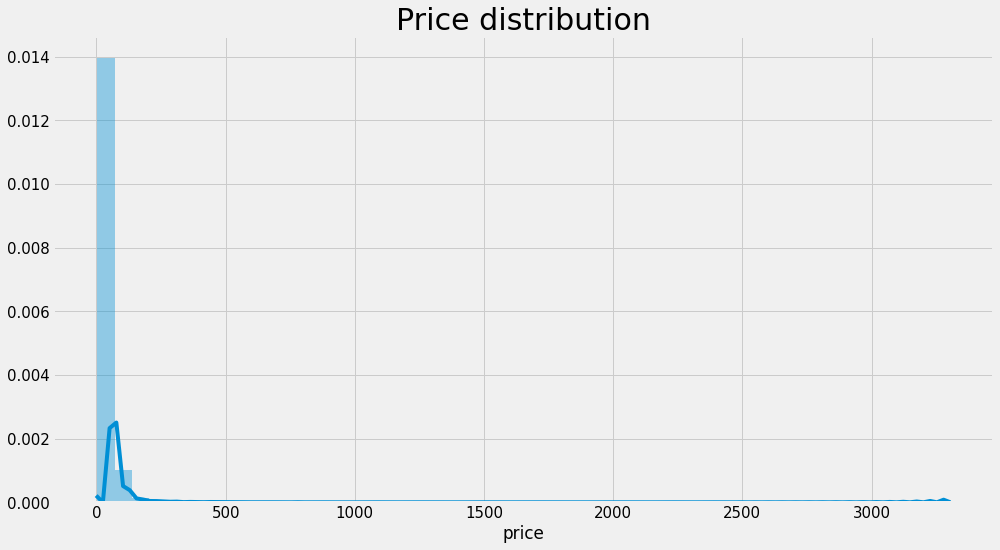

In [26]:
plt.figure(figsize = (15, 8))
sns.distplot(wine_df['price'])
plt.title("Price distribution", fontsize = 30)

- Như ở trên ta thấy miền giá trị của biến price là rất lớn. Nhưng giá trị trung bình chỉ là 35.36 nên có các giá trị ngoại vi rất lớn ( trên 3000 ) khiến phân phối bị lệch trái, rất khó quan sát. Do đó để tránh sự ảnh hưởng của các giá trị ngoại vi, ta chuẩn hóa price bằng cách lấy log để xem phân bố biến price như thế nào.

In [27]:
# Tạo thêm biến price_log
wine_df['price_log'] = np.log(wine_df['price'])

Text(0.5, 1.0, 'Price log distribution')

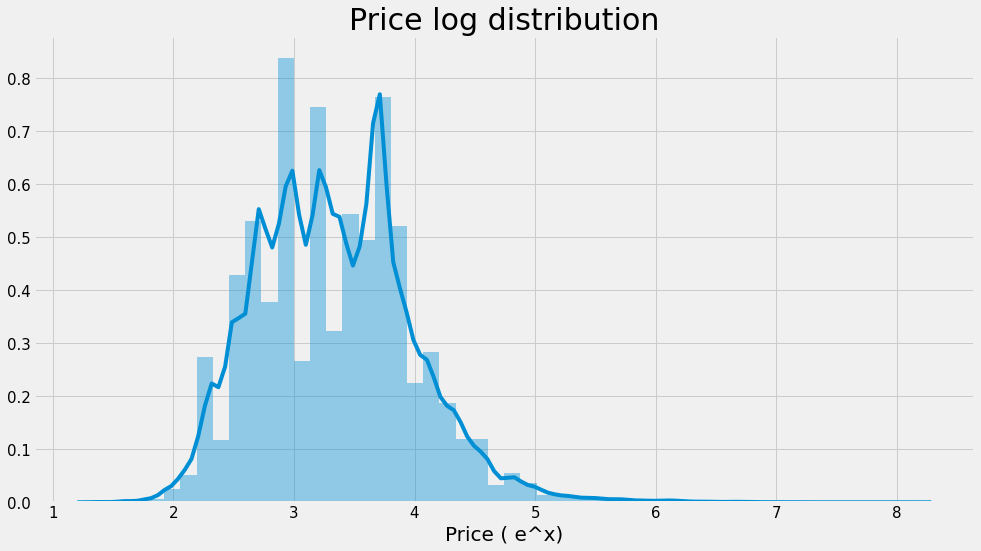

In [28]:
# Chuẩn hóa bằng cách lấy log biến price
plt.figure(figsize = (15, 8))
sns.distplot(wine_df['price_log'])
plt.xlabel('Price ( e^x)', fontsize = 20)
plt.title("Price log distribution", fontsize = 30)

- Lúc này ta thấy phân phối của dữ liệu đã gần phân phối chuẩn hơn. 
- Đa phần mức giá rbượu nằm trong khoảng từ 13 dến 95 đô.

### Phân phối của biến points

Text(0.5, 1.0, 'Distribution of points')

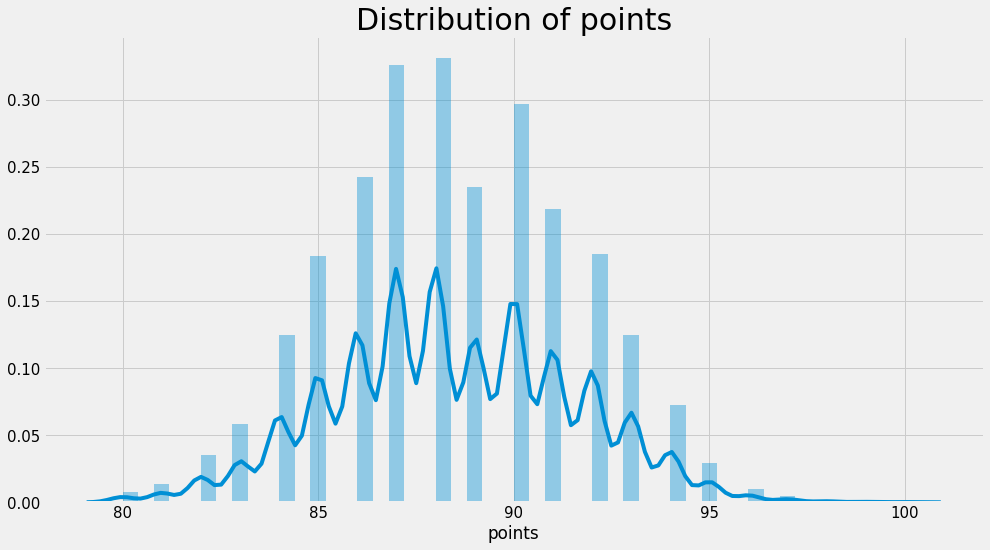

In [29]:
plt.figure(figsize = (15, 8))
sns.distplot(wine_df['points'])
plt.title("Distribution of points", fontsize = 30)

- Phần lớn điểm đánh giá nằm trong khoảng 80-95 điểm.

### Sự tương quan giữa biến price và points

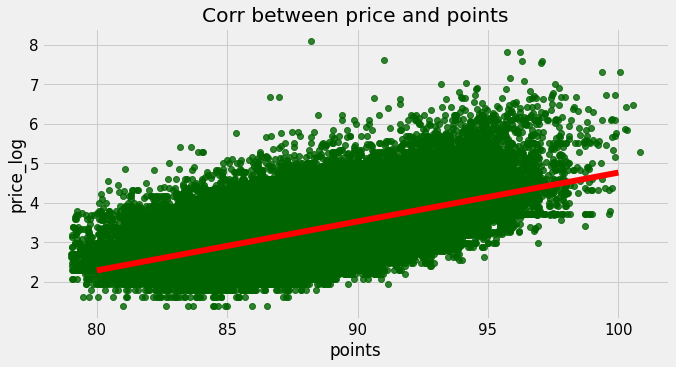

In [30]:
plt.figure(figsize = (10, 5))
plot = sns.regplot(x = 'points', y = 'price_log', data = wine_df, line_kws={'color':'red'}, 
                  x_jitter=True, fit_reg=True, color='darkgreen')
plot.set_title("Corr between price and points")
plt.show()

Một biểu đồ nhiều ý nghĩa 
- Cho ta thấy khi điểm càng cao thì giá càng tăng.
- Hầu hết các loại rượu đắc tiền nhất thì nằm trong khoảng điểm từ 87-92

### Thống kê số lần xuất hiện của các quốc gia

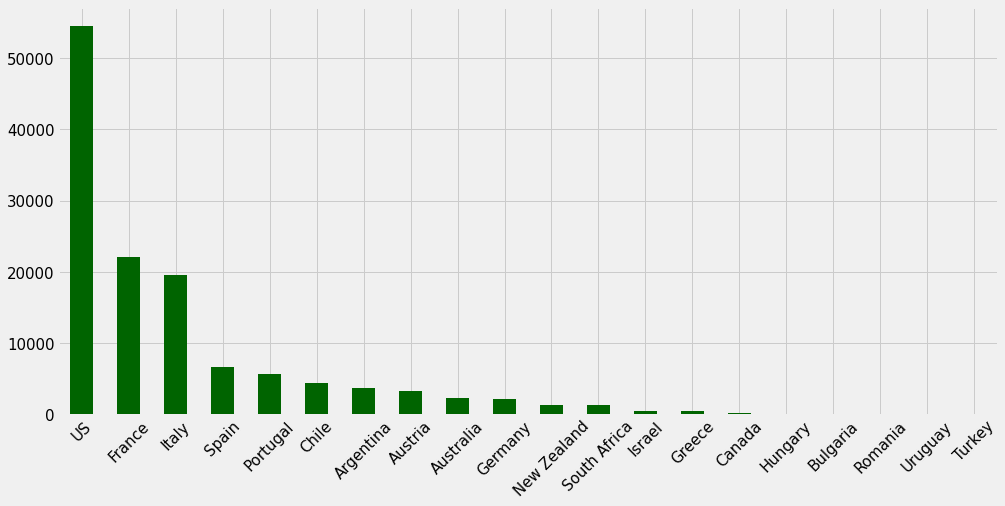

In [31]:
plt.figure(figsize = (15, 7))
country = wine_df['country'].value_counts().sort_values(ascending = False)
country[:20].plot.bar(color = 'darkgreen')
plt.xticks(rotation = 45)
plt.show()

- Chúng ta kì vọng sẽ thấy được các quốc gia nổi tiếng và lâu đời trong ngành công nghiệp sản xuất rượu như: Ý, Pháp, Tây Ban Nha...

# Đưa ra các câu hỏi cần trả lời

Sau khi có cái nhìn tổng quát và hiểu hơn về dữ liệu, giờ đây mình bắt đầu thấy tò mò và đặt nhiều câu hỏi trong đầu. May thay những câu hỏi này đều có thể giải quyết thông qua dữ liệu.

**1**. Những tỉnh thành nào có nhiều khu vực sản suất rượu nhất và mức giá rượu trung bình , điểm số trung bình giữa các tỉnh thành này.


**2**. Những quốc gia nào có nhiều tỉnh thành sản suất rượu nhất và mức giá rượu trung bình, điểm số trung bình giữa các quốc gia này.

**3** Những nhà sản suất rượu vang nào nổi tiếng nhất thế giới? (Masseto, Fontodi...)

**4**. Loại nho nào được dùng nhiều nhất dể sản suất rượu vang ? Các giống nho phổ biến ở các khu vực quốc gia? Giá tiền và điểm số trung bình cho 1 chai rượu được sản xuất từ chúng? 

**5**.  Những tác giả nào có nhiều bài nhận xét, đánh giá nhất và khoảng điểm của họ cho trong bài nhận xét của mình.

**6**. Độ tuổi của rượu có ảnh hưởng như thế nào đến giá của các loại rượu không.

**7**. Phân tích các bình luận, các từ ngữ được dùng nhiều nhất và ảnh hưởng như thế nào đến việc cho điểm


---

# Phân tích dữ liệu để trả lời cho các câu hỏi

`Trước khi đi vào trả lời các câu hỏi về rượu nho. Chúng ta hãy nạp thêm 1 ít kiến thức về rượu nho nào.`

 - Với mỗi quốc gia làm rượu vang, thì mỗi nước có công thức và vùng đất nào đó thích hợp cho việc trồng nho làm rượu. Rượu vang được làm từ những trái nho. Ở đây, nho được chọn làm rượu vang là những trái có tiêu chuẩn riêng như trái nhỏ, ngọt, có da dày và chứa hạt. Có rất nhiều rất nhiều loại nho dùng làm rượu thương mại đã được xác định, nhưng chỉ có khoản 150 loại được trồng làm rượu vang trên thế giới.

Rượu vang là gì?

- <font color = 'blue'>Độ ngon</font> của 1 chai rượu thường được quyết định bởi 3 yếu tố:
    + Giống nho
    + Vùng trồng nho
    + Quy trình sản suất
    
 
<font color='blue'> Giống nho </font>:  có rất nhiều giống nho được sử dụng làm rượu vang, mỗi giống sẽ có màu, mùi vị khác nhau. 
    
Các vùng trồng nho nổi tiếng trên thế giới:
 + Nước Italia : Tuscany
 + Nước Tây Ban Nha: vùng rượu vang Rioja
 + Nước Pháp:Vùng rượu vang Bordeaux

In [32]:
# 2 hàm vẽ là barchart và boxplot được dùng nhiều
def barchart_plot(distinct_val, attr_gr, attr_agg, x_label, y_label, title):
    '''
    func: Dùng để vẽ biểu đồ bar chart
    ---------
    Parameter:
    
    distinct_val: list 1-d
                  dùng để lọc dataframe có giá trị biến attr_gr nằm trong distinct_val.
    attr_gr: string
             Thuộc tính được groupby
    attr_agg: string 
              Thuộc tính được dùng để thực thiện các phép tính aggregation
    x_label : string
              label for x coordinate in chart
    y_label : string
              label for y coordinate in chart
    title   : string
              title for chart
    
    '''
    df_top = wine_df.loc[wine_df[attr_gr].isin(distinct_val)]
    df = df_top.groupby(attr_gr)[attr_agg].nunique().sort_values(ascending = False)
    df.plot.bar(use_index = True, color = 'darkgreen')
    plt.xlabel(x_label, fontsize = 20)
    plt.ylabel(y_label,fontsize = 20)
    plt.xticks(rotation = 40, fontsize = 10)
    plt.title(title, fontsize = 20)
    plt.show()
    
    
def boxplot_chart(distinct_val, x, y, title):
    '''
    func: Dùng để vẽ biểu boxplot
    ---------
    Parameter:
    
    distinct_val: list 1-d
                  dùng để lọc dataframe có giá trị biến x nằm trong distinct_val.
    x: string
    y: string 
    title   : string
              title for chart
    '''
    plt.figure(figsize = (15, 7))
    df_top = wine_df.loc[wine_df[x].isin(distinct_val)]
    sns.boxplot(x = x , y = y, data = df_top, color = 'darkgreen')
    plt.xticks(rotation = 45, fontsize = 10)
    plt.title(title, fontsize = 20)
    plt.show()
    

## 1.  Những tỉnh thành nào có nhiều khu vực sản suất rượu nhất và mức giá rượu , điểm số trung bình giữa các tỉnh thành này.

<font color='blue'>Độ ngon</font> của 1 chai rượu vang được quyết định bởi loại nho làm nên. Tuy nhiên có thể nói thổ nhưỡng, và khí hậu tại vùng trồng nho là yếu tố quyết định để tạo nên rượu vang với hương vị hoàn hảo. Tại mỗi vùng trồng nho đều có hàm lượng khoáng chất nuôi dưỡng cây nho và khí hậu đặc trưng. Có những loại nho chỉ có thể phát triển trên những mảnh đất đặc thù mà không thể tạo ra trên những mảnh đất khác.

--> **Đó là lí do đầu tiên để chúng ta tiến hành phân tích những vùng trồng nho nổi tiếng nhất thế giới.**

Tạo biến province chứa 20 tỉnh thành được xem xét nhiều nhất trong tập dữ liệu.

In [33]:
province = wine_df['provinceOfCountry'].value_counts()[:20]
top_province = province.index.values

### Những tỉnh nào có nhiều khu vực trồng nho nhất

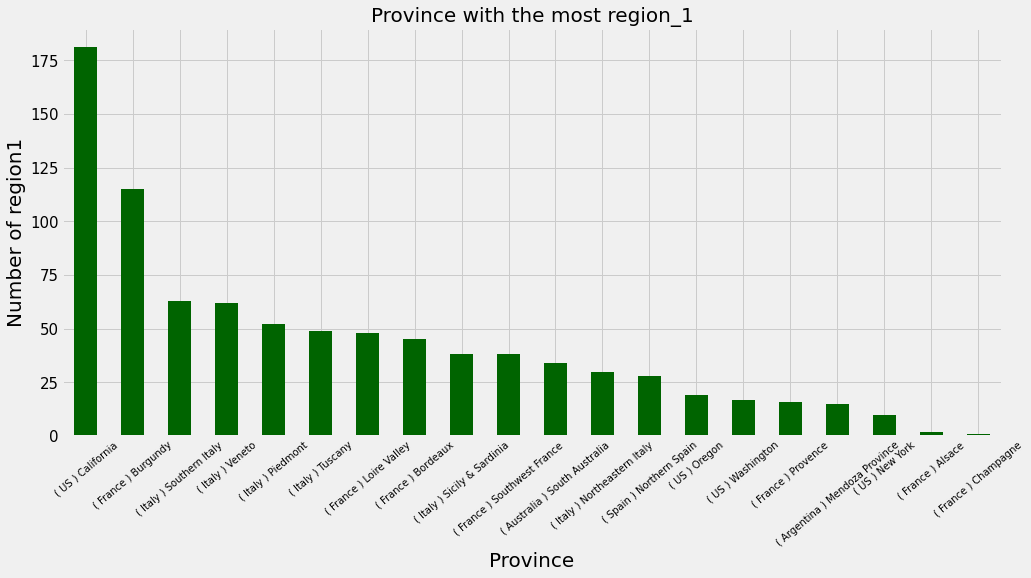

In [34]:
barchart_plot(top_province ,'provinceOfCountry', 'region_1', 'Province', 'Number of region1' ,'Province with the most region_1')

**Nhận xét:**

- Tỉnh ( bang ) có nhiều khu vực trồng nho nhất thế giới là California ở Mỹ, với số lượng vườn nho ở lên tới 175. Xếp sau là Burgundy của Pháp và những tỉnh thuộc Ý. Nếu chúng ta tìm hiểu thì sẽ biết đây là những nơi xuất xứ của những loại rượu vang trứ danh, thuộc các nước nổi tiếng với ngành công nghiệp rượu nho.

### Chúng ta thường nghe về những chai rượu cực kì mắc tiền, vậy chúng xuất xứ từ đâu?

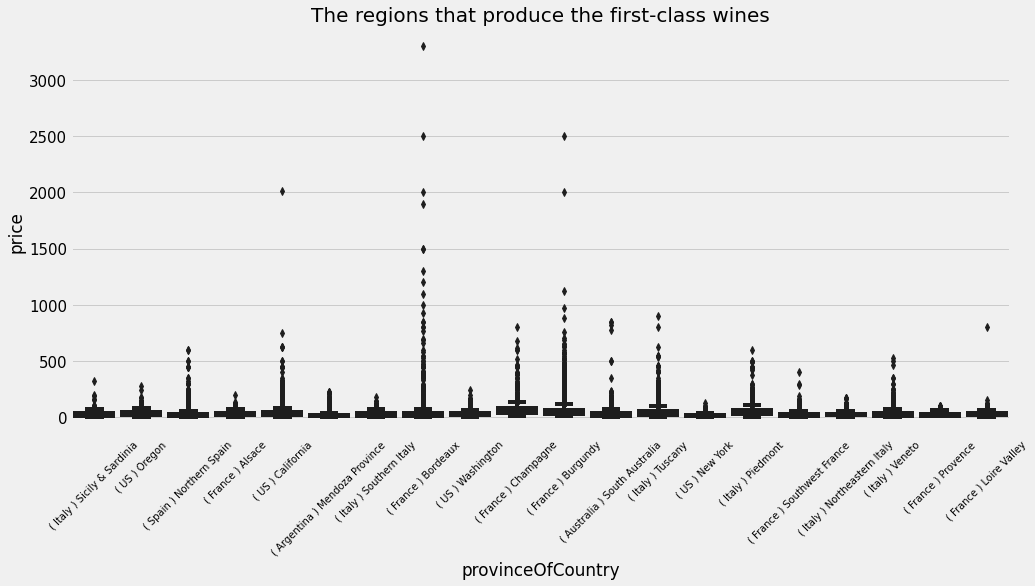

In [35]:
boxplot_chart(top_province, 'provinceOfCountry', 'price', 'The regions that produce the first-class wines' )

**Nhận xét:**

- Biểu đồ trên cho ta biết những vùng nào chuyên sản xuất những loại rượu vang xa xỉ và có chất lượng nhất thế giới. Những chai rượu vang có giá hàng nghìn đô, đến từ các vùng trồng nho nổi tiếng của Pháp, Mỹ, Ý,...

*** chèn hình ***

### Những tỉnh thành nào sở hữu nhiều thương hiệu rượu nhất

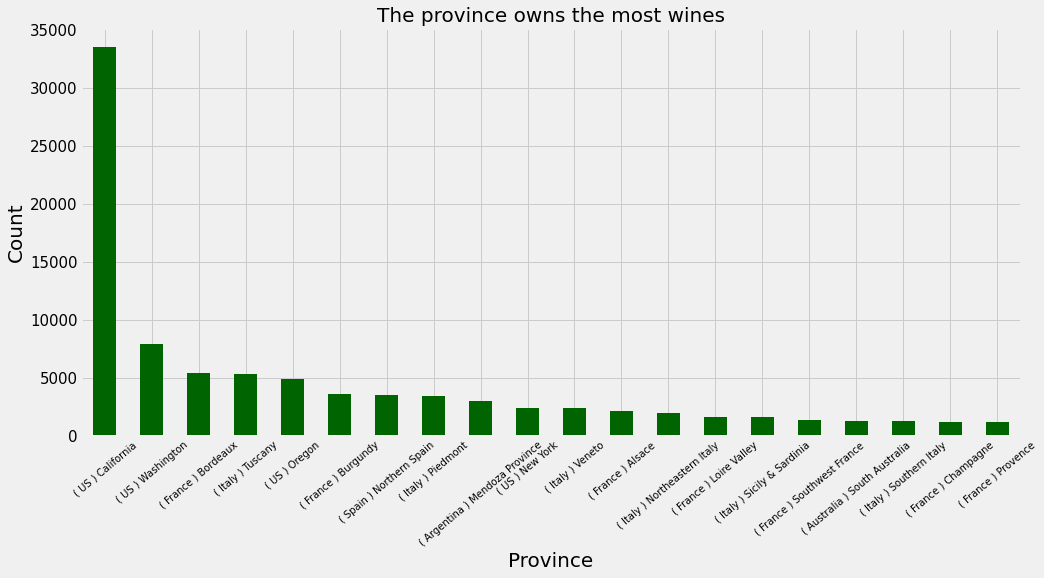

In [36]:
barchart_plot(top_province, 'provinceOfCountry', 'title', 'Province', 'Count', 'The province owns the most wines' )

**Nhận xét**

- Ở bang của Mỹ là California và Washington là 2 khu vực có nhiều loại rượu nhất. Tiếp đến là Bordeaux của Pháp và Tuscany của Ý.

### Những vùng nào có thể trồng được nhiều loại nho nhất? Variety là loại nho dùng để làm rượu

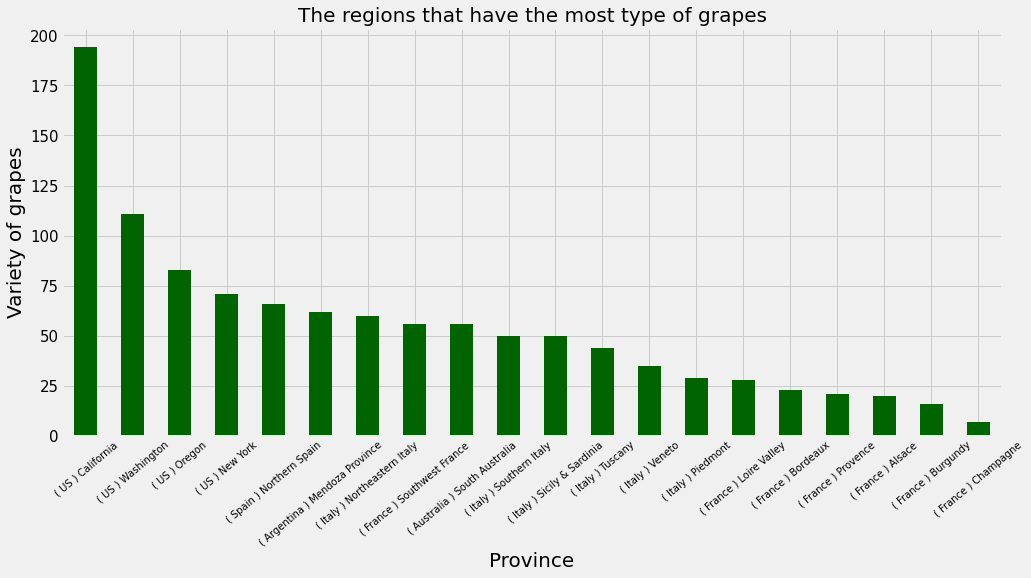

In [37]:
barchart_plot(top_province, 'provinceOfCountry', 'variety', 'Province', 'Variety of grapes',\
                                                  'The regions that have the most type of grapes' )

**Nhìn qua thử xem California có những loại nho nào để làm rượu? Có số nào trong đó các bạn biết không?**

In [38]:
wine_df[wine_df['province']=='California']['variety'].value_counts(ascending=False).index[:10]

Index(['Pinot Noir', 'Cabernet Sauvignon', 'Chardonnay', 'Zinfandel', 'Syrah',
       'Sauvignon Blanc', 'Red Blend', 'Merlot', 'Bordeaux-style Red Blend',
       'Petite Sirah'],
      dtype='object')

**Nhận xét**

- Wao, những bang của Mỹ là nơi trồng được nhiều loại nho nhất. Điều này hợp lí vì diện tích nước Mỹ là rất lớn, và rất nhiều vùng phù hợp với sự phát triển của các giống nho.

- Các quốc gia Châu Âu là có truyền thống về trồng và sản xuất nho. Với khí hậu ôn hòa, phần lớn loại nho làm rượu được trồng ở  tỉnh thành các quốc gia Châu Âu này.

- Ngoài những nước ở Châu âu, Bắc mỹ thì giờ chúng ta thấy 1 đại diện ở Nam mỹ là Argentina.

### Sau khi đi qua 1 vài thông tin về mức giá, số loại rượu. Giờ chúng ta phân tích xem những khu vực nào được đánh giá cao về chất lượng rượu

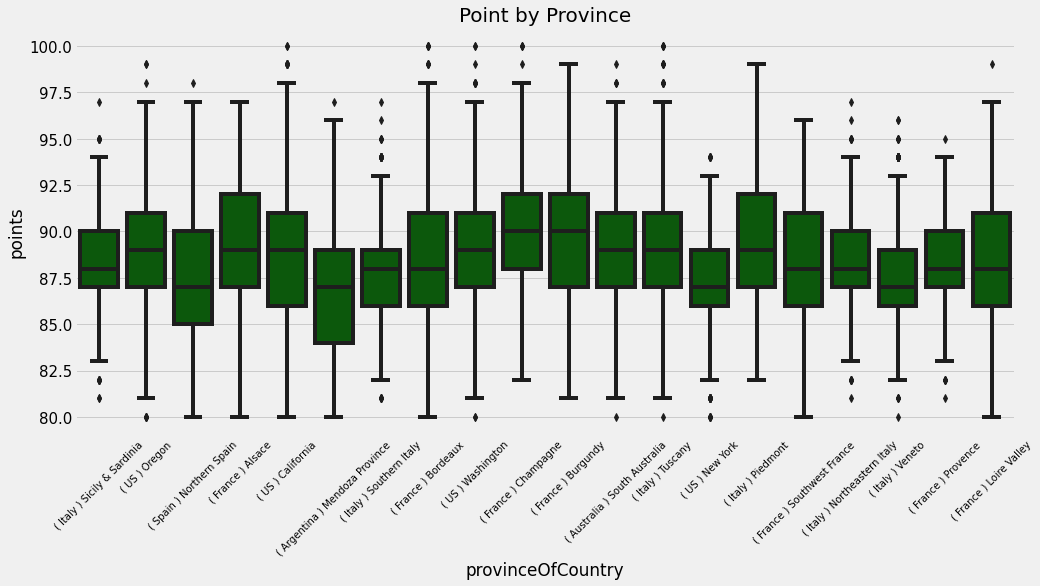

In [39]:
boxplot_chart(top_province, 'provinceOfCountry', 'points', 'Point by Province')

**Nhận xét**

- Các vùng sản xuất rượu nho của Pháp như Burgundy, Alsace, ... hay Ý là Piedmont - được cho điểm đánh giá trung bình cao về chất lượng rượu.


- Cũng có nhiều vùng sở hữu các thương hiệu rượu được đánh giá rất cao lớn hơn 97 điểm, vẫn đến từ các khu vực của Ý, Pháp, Mỹ.


- Giờ thì biết nên mua rượu từ vùng nào rồi.

---

## 2.Những quốc gia nào có nhiều khu vực sản suất rượu nhất và mức giá rượu , điểm số trung bình giữa các quốc gia này.

Nho là chịu ảnh hưởng rất lớn bởi khí hậu và đất đai, tùy khu vực mà Nho có thể cho năng suất, sản lượng và chất lượng cao cho việc làm rượu. Do đó không phải quốc gia nào cũng may mắn có nhiều khu vực để trồng nho. Qua vài thông tin trên, chúng ta cũng thấy được là những vùng trồng nho nổi tiếng thường tập trung ở các nước quốc gia Châu Âu, Bắc Mỹ, Nam Mỹ. Vậy hãy cùng phân tích một chút về các quốc gia đứng đầu ở ngành công nghiệp này nhé! 


- Ta chỉ xét trên 20 quốc gia có nhiều đánh giá nhất. và trước đó danh sách 20 quốc gia này được lưu trong biến country

In [40]:
top_country = country.index.values[:20]

### Những quốc gia có nhiều tỉnh thành sản suất rượu nhất

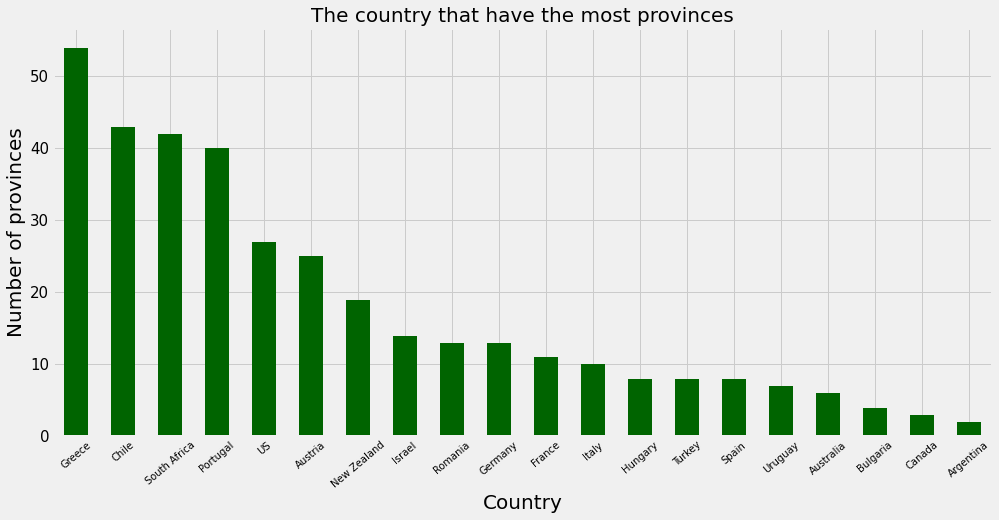

In [41]:
barchart_plot(top_country, 'country', 'province', 'Country', 'Number of provinces', 'The country that have the most provinces')

**Nhận xét**

- Ngoài Mỹ ra thì những quóc gia còn lại đều không phải là những quốc gia có những những vùng sản xuất rượu nổi tiếng thế giới.


- Có những quốc gia ở khu vực Châu Âu như Hy Lạp ( Greece ), Bồ Đào Nha ( Portugal ) là những quốc gia có nhiều tỉnh thành sản xuất rượu nhất. Ở châu Phi có 1 đại diện là Nam Phi với 42 tỉnh thành trồng nho. Ở Nam mỹ thì có Chi Lê. Những quốc gia này rất may mắn khi có điện kiện thiên nhiên phù hợp cho việc trồng nho sản suất rượu. Nhưng vẫn còn thiếu vài yếu tố nữa để đưa chất lượng rượu cao hơn, mình nghĩ đó là công thức làm rượu.

### So sánh mức giá rượu giữa các quốc gia có nhiều lượt nhận xét nhất

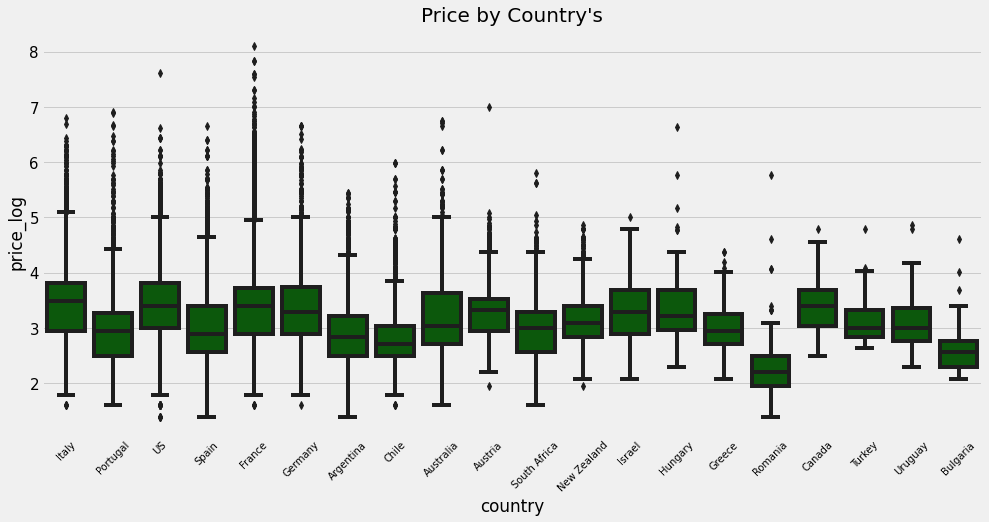

In [42]:
boxplot_chart(top_country, 'country', 'price_log', "Price by Country's")

**Nhận xét**

- Mức giá rượu trung bình cao nhất thuộc về các quốc gia có truyền thống sản suất rượu như Ý, Mỹ, Pháp, ... 
- Trong đó Pháp là quốc gia sở hữu những loại rượu đắt đỏ nhất.

### Điểm số trung bình về rượu vang của các quốc gia có nhiều lượt nhận xét nhất

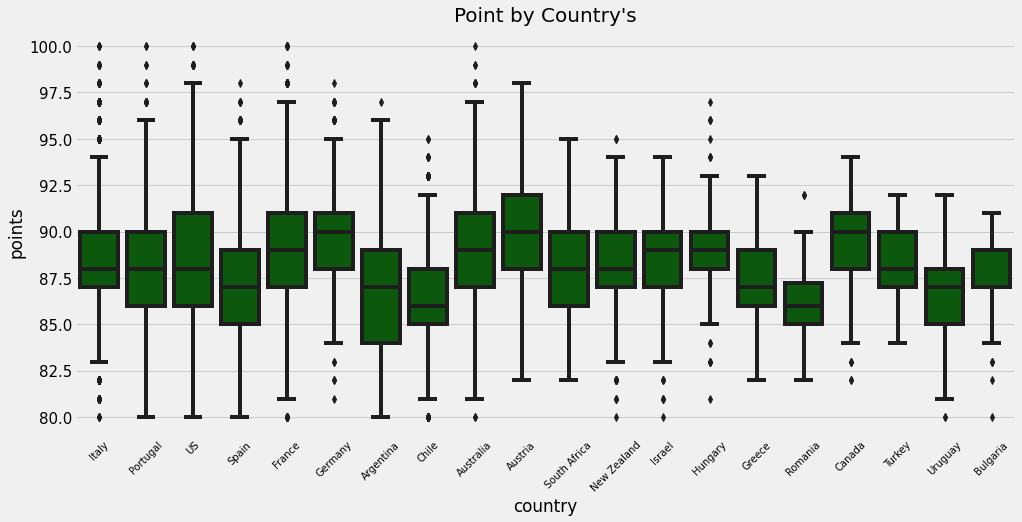

In [43]:
boxplot_chart(top_country, 'country', 'points', "Point by Country's")

**NHận xét**

- Điểm số trung bình về rượu cao nhất là ở Austria ( mình không biết quốc gia này ) 
- Ở các quốc gia có truyền thống như Ý, Pháp, mặc dù trung bình điểm số không quá cao nhưng ở đây luôn có những loại rượu thượng hạng được đánh giá rất cao. Khiến tên tuổi các khu vực làm rượu ở các quốc gia này rất nổi tiếng.

---

## 3 Những nhà sản suất rượu vang nào nổi tiếng nhất thế giới

Chúng ta đã cùng tìm hiểu qua về các vùng đất nổi tiếng và phù hợp cho việc trồng nho. Đó là tiêu chí đầu tiên để làm ra 1 loại rượu ngon. Giờ chúng ta cùng đến với tiêu chí thứ 2 là cũng không kém phần quan trọng là <font color= 'red'> quy trình sản suất rượu </font>. Mỗi nhà sản suất rượu vang đều có riêng cho những công thức cho để cho ra hương vị ngon nhất. Giờ chúng ta cùng tìm hiểu những nhà sản suất rượu này là ai, thuộc quốc gia nào. 



Làm thế nào để đánh giá đó là 1 nhà sản suất rượu vang nổi tiếng, theo cá nhân mình thì sẽ xem xét theo những tiêu chí sau:

- Điểm số đánh giá trung bình các loại rượu của hãng, và cũng xét trên 1 số lượng nhận xét, đánh giá nhất định để có độ tin cậy cao.


- Mức giá rượu của trung bình của các hãng. Vì có thể có 1 số chỉ tập trung vào phân khúc rượu cao cấp nên chất lượng cao.

In [44]:
# Ta tiến hành gom nhóm theo winery và tính điểm số trung bình và số lượng loại rượu được đánh giá của hãng

top_manufacture_of_wine = wine_df.groupby(['winery', 'country']).agg({'points':'mean', 
                                        'price': ['mean', 'size']}).sort_values(by=[('price', 'size')], ascending = False)
top_manufacture_of_wine[:10]

points       price     
                                     mean        mean size
winery                country                             
Wines & Winemakers    Portugal  87.599099   18.012781  222
Testarossa            US        90.738532   52.011805  218
DFJ Vinhos            Portugal  86.669767   11.689812  215
Williams Selyem       US        92.744076   59.587678  211
Louis Latour          France    90.537688  122.580991  199
Georges Duboeuf       France    87.403061   27.763128  196
Chateau Ste. Michelle US        88.726804   22.147286  194
Concha y Toro         Chile     87.609756   30.430323  164
Columbia Crest        US        87.880503   19.424990  159
Kendall-Jackson       US        88.638462   26.007692  130

**Nhận xét**

- Ở đây mình có thể đánh giá hãng sản xuất rượu `Wiliams Seylyem` là nhà sản xuất để làm những loại rượu hảo hạn được đánh giá cao vì điểm số cao và số lượng đánh giá cũng lớn.
- Các nhà sản suất rượu của Mỹ chiếm phần lớn đánh giá, và nhìn chung thì các nhà sản suất rượu ở quốc gia này này được đánh giá cao.

### Xếp hạng mức giá rượu của các hãng sản suất của thuộc nhóm đầu

- Ta chỉ xét trên 20 nhà sản xuất rượu xuất hiện nhiều nhất để đảm bảo độ tin cậy cao. và lưu vào biến winery

In [45]:
winery = wine_df['winery'].value_counts()[:20]
top_winery = winery.index.values

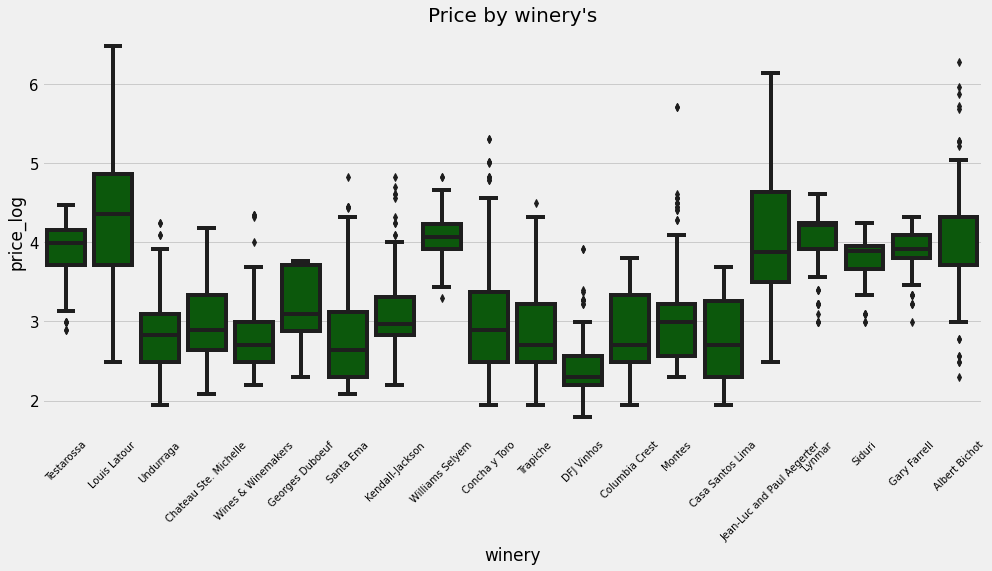

In [46]:
boxplot_chart(top_winery, 'winery', 'price_log', "Price by winery's" )

**Nhận xét**

- Có 1 vài nhà sản xuất chỉ chuyên sản xuất những dòng rượu giá rẻ hơn như  DFJ Vinhos, Wines & Winemakers...


- Bên cạnh đó cũng có các nhà sản suất chuyên về các dòng rượu cao cấp như Louis Latour, William Selyem ...

### Mức điểm của các hãng sản suất thuộc sản xuất.

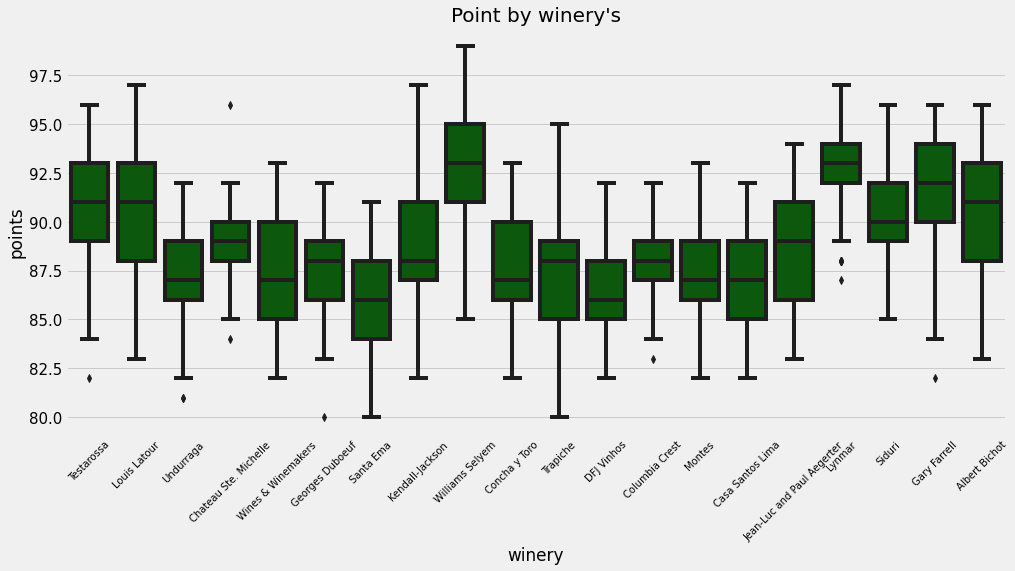

In [47]:
boxplot_chart(top_winery, 'winery', 'points', "Point by winery's") 

**Nhận xét**

- William Selyem là nhà sản xuất rượu được đánh giá cao nhất vì đơn giản hãng này toàn sản xuất rượu cao cấp nên chất lượng cao.

### Những quốc gia nào mà có nhiều nhà sản xuất rượu nhất

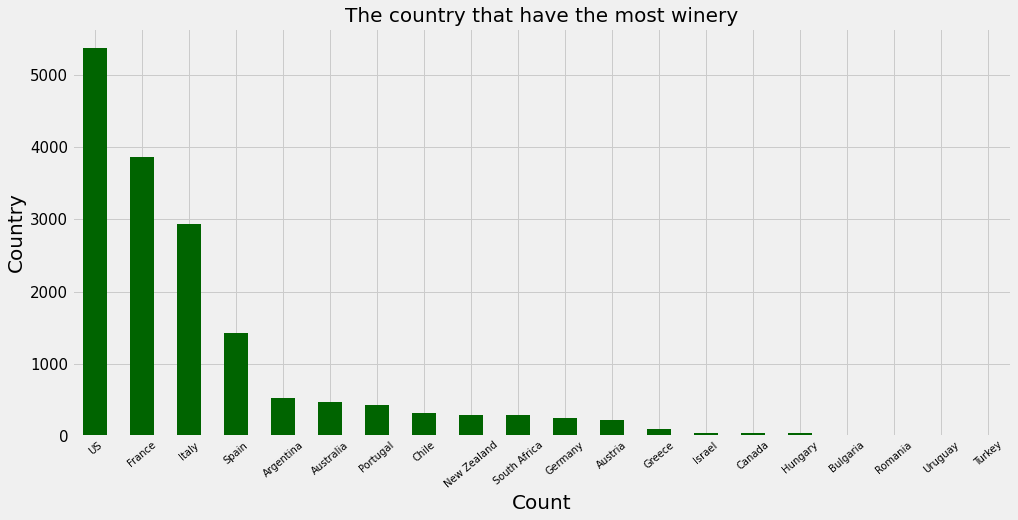

In [48]:
barchart_plot(top_country, 'country', 'winery', 'Count', 'Country', 'The country that have the most winery')

**Nhận xét**

- Mỹ là quốc gia có nhiều nhà sản xuất rượu nhất, tiếp theo là các quốc gia ở Châu Âu, Nam Mỹ và Úc.

**Nhận xét chung**

- Vậy chúng ta cũng đã cùng tìm hiểu qua các nhà sản suất rượu nổi tiếng, điểm số đánh giá, mức giá rượu, quốc gia thuộc về.

---

## 4. Loại nho nào được dùng nhiều nhất dể sản suất rượu vang ? Các giống nho phổ biến ở các khu vực quốc gia? Giá tiền và điểm số trung bình cho 1 chai rượu được sản xuất từ chúng?

Chúng ta đã phân tích được 2 yếu tố đầu để có được 1 chai rượu ngon là nhà sản suất và vùng trồng nho. Giờ chúng ta cùng phân tích yếu tốt rất quan trọng còn lại là giống nho.

Những loại nho làm rượu thường có kích thước nhỏ hơn nho ăn, vỏ dày hơn và luôn chứa hạt. Trong dataset, các giống nho được lưu trong thuộc tính `variety`.

- Ở đây ta cũng xét trên 20 giống nho được đánh giá nhiều nhất và lưu vào biến variety

In [49]:
variety = wine_df['variety'].value_counts()[:20]
top_variety = variety.index.values

### Các giống nho nào được sử dụng nhiều nhất để làm rượu vang ?

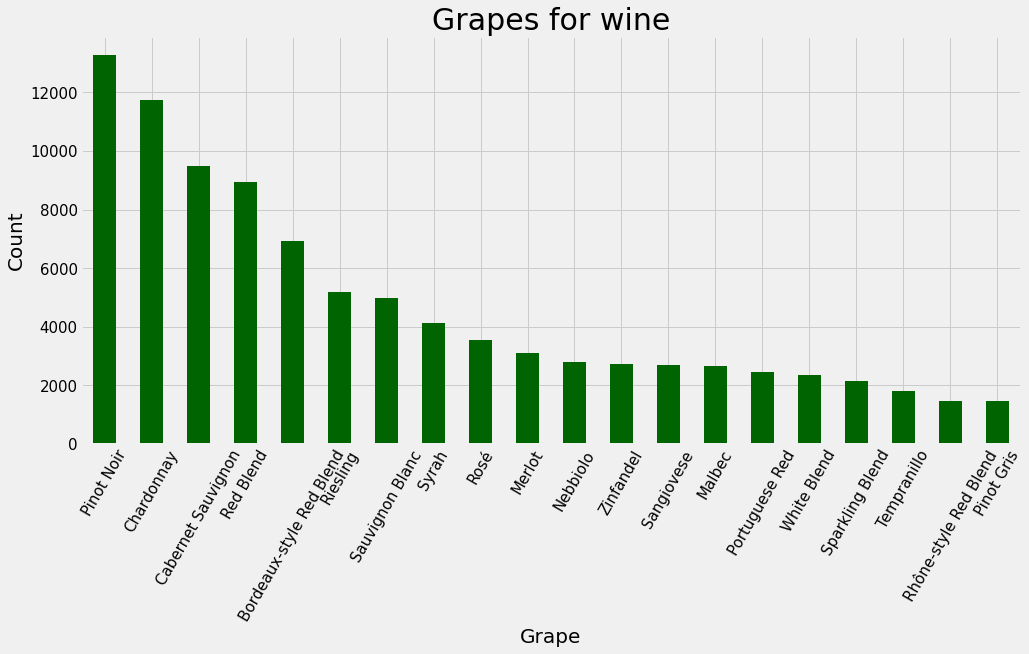

In [50]:
variety.plot.bar(use_index = True, color = 'darkgreen')
plt.title("Grapes for wine", fontsize = 30)
plt.ylabel("Count", fontsize = 20)
plt.xlabel("Grape", fontsize = 20)
plt.xticks(rotation= 60)
plt.show()

**Nhận xét**

- Thật không có gì bất ngờ. Nếu có tìm hiểu từ trước thì những loại nho trong nhóm 10 đều là những loại nho phổ biến nhất dùng để làm rượu vang. 

**Chèn hình**

### Loại nho nào được trồng ở nhiều quốc gia nhất ?

Để trả lời câu hỏi này, ta làm 2 bước:

- Bước 1: Tạo bảng dataframe đặt tên là df_variety với index là variety, cột 1 là grape_in_country_nunique, cột 2 là grape_in_country_unique
        
        + Thống kê số lượng quốc gia của mỗi loại nho và lưu vào biến grape_in_country_nunique
        + Thống kê tên quốc gia của mỗi loại nho và lưu vào biến grape_in_country_unique 
        
- Bước 2: Dựa vào dataframe vừa tạo vẽ biểu đồ barchart

- Bước 1:

In [51]:
df_top_variety = wine_df.loc[wine_df['variety'].isin(top_variety)]
grape_in_country_nunique = df_top_variety.groupby('variety')['country'].nunique()
grape_in_country_unique = df_top_variety.groupby('variety')['country'].unique()

In [52]:
data = {'grape_in_country_nunique': grape_in_country_nunique, 'grape_in_country_unique': grape_in_country_unique}
df_variety = pd.DataFrame(data)
df_variety = df_variety.sort_values(by='grape_in_country_nunique', ascending = False)
df_variety

,grape_in_country_nunique,grape_in_country_unique
variety,,
White Blend,34,"[Italy, France, South Africa, Greece, US, Hung..."
Red Blend,34,"[US, Italy, Chile, Spain, South Africa, Argent..."
Chardonnay,31,"[US, France, Australia, Chile, South Africa, A..."
Rosé,29,"[Australia, France, US, Spain, Portugal, Italy..."
Sauvignon Blanc,27,"[US, New Zealand, Australia, Italy, Chile, Aus..."
Merlot,26,"[US, Chile, Argentina, South Africa, France, I..."
Pinot Noir,25,"[US, Chile, France, New Zealand, Australia, It..."
Cabernet Sauvignon,24,"[US, Italy, South Africa, Chile, Australia, Ar..."
Riesling,24,"[US, Germany, France, Austria, Australia, Chil..."


- Bước 2:

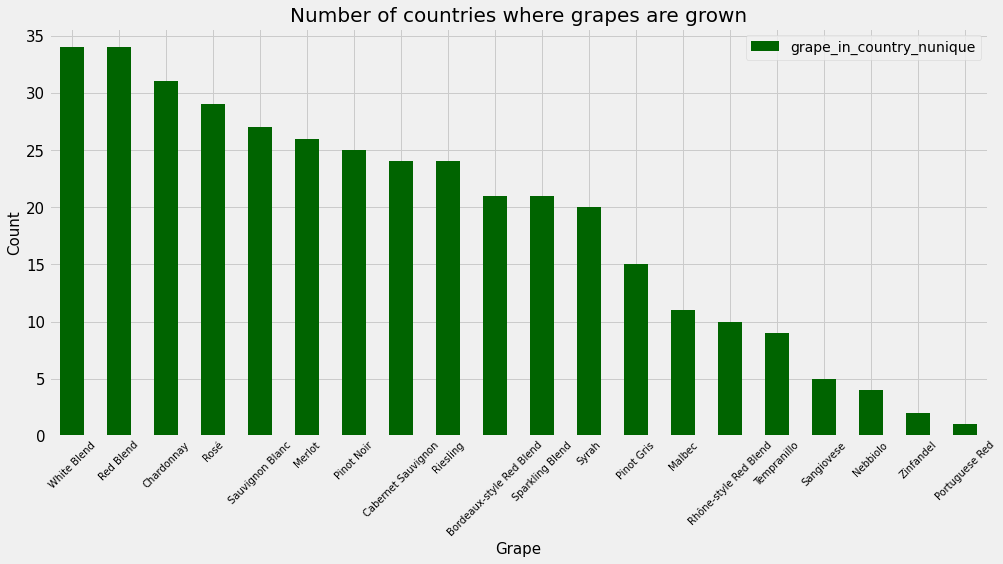

In [53]:
df_variety.plot.bar(use_index = True, y = 'grape_in_country_nunique', color = 'darkgreen')
plt.title("Number of countries where grapes are grown", fontsize = 20)
plt.ylabel("Count", fontsize = 15)
plt.xlabel("Grape", fontsize = 15)
plt.xticks(rotation = 45, fontsize = 10)
plt.show()

**Nhận xét**

- Wao vẫn là các loại nho này. Đa phần các loại nho được dùng nhiều làm rượu đều có thể trồng được ở nhiều quốc gia. Nhưng chắc chắn thì mỗi quốc gia sẽ mang lại 1 hương vị nho khác nhau.

### Nói các giống nho phổ biến này được trồng ở nhiều quốc gia trên thế giới, nhưng chúng ta thử tìm xem nơi nào mà giống nho này dùng để làm rượu có giá trị cao nhất nha

Để lấy được thông tin này: 

- Bước 1: Tính giá trị trung bình của mỗi loại nho ở các tỉnh thành.
- Bước 2: Tìm ra tình thành mà rượu được sản suất bởi loại nho này có giá trị trung bình cao nhất

Bước 1

In [54]:
grape_for_price = df_top_variety.groupby(['variety', 'provinceOfCountry'])['price'].agg('mean')

grape_for_price = grape_for_price.unstack('variety')
grape_for_price

variety,Bordeaux-style Red Blend,Cabernet Sauvignon,Chardonnay,Malbec,Merlot,Nebbiolo,Pinot Gris,Pinot Noir,Portuguese Red,Red Blend,Rhône-style Red Blend,Riesling,Rosé,Sangiovese,Sauvignon Blanc,Sparkling Blend,Syrah,Tempranillo,White Blend,Zinfandel
provinceOfCountry,,,,,,,,,,,,,,,,,,,,
( Argentina ) Mendoza Province,40.98271,19.985680,17.937927,28.217711,17.903846,64.0,15.502529,18.324739,NaN,33.192091,NaN,15.0,13.791948,18.0,14.234375,17.083333,17.885627,13.5,23.540405,NaN
( Argentina ) Other,40.75000,15.388889,14.583671,25.209790,17.644302,NaN,13.000000,28.573127,NaN,38.750000,NaN,NaN,12.500000,NaN,17.571429,19.600000,15.444444,NaN,11.285714,NaN
( Armenia ) Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
( Australia ) Australia Other,NaN,11.444444,13.279460,8.000000,11.000000,NaN,NaN,14.250000,NaN,14.111111,NaN,11.0,26.958442,NaN,19.696475,12.133333,NaN,NaN,38.000000,NaN
( Australia ) New South Wales,NaN,14.000000,17.700000,15.000000,13.000000,NaN,NaN,33.000000,NaN,NaN,NaN,NaN,16.000000,NaN,20.000000,12.000000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
( Uruguay ) Montevideo,NaN,NaN,NaN,17.000000,NaN,NaN,NaN,NaN,NaN,60.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
( Uruguay ) Progreso,NaN,22.000000,NaN,NaN,NaN,NaN,NaN,15.333333,NaN,46.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
( Uruguay ) San Jose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Bước 2

In [57]:
grape_in_best_province = grape_for_price.idxmax(axis = 0)

- Kiểm tra loại nho ứng với khu vực mang lại giá trị cao nhất khi trồng nó để sản suất rượu. Mỗi loại thực sự được trồng ở mỗi khu vực sẽ cho những chất lượng rất khác nhau.

In [56]:
print(" Loại nho Red Blend cho giá trị rượu tốt nhất ở: ", grape_in_best_province['Red Blend'])
print(" Loại nho Pinot Noir cho giá trị rượu tốt nhất ở: ", grape_in_best_province['Pinot Noir']) 
print(" Loại nho Chardonnay cho giá trị rượu tốt nhất ở: ", grape_in_best_province['Chardonnay']) 
print(" Loại nho Cabernet Sauvignon cho giá trị rượu tốt nhất ở: ", grape_in_best_province['Cabernet Sauvignon']) 
print(" Loại nho Merlot cho giá trị rượu tốt nhất ở: ", grape_in_best_province['Merlot']) 

 Loại nho Red Blend cho giá trị rượu tốt nhất ở:  ( Chile ) Puente Alto
 Loại nho Pinot Noir cho giá trị rượu tốt nhất ở:  ( Switzerland ) Switzerland
 Loại nho Chardonnay cho giá trị rượu tốt nhất ở:  ( Spain ) Spain Other
 Loại nho Cabernet Sauvignon cho giá trị rượu tốt nhất ở:  ( US ) Michigan
 Loại nho Merlot cho giá trị rượu tốt nhất ở:  ( Italy ) Southern Italy


### Giá tiền cho các rượu được làm từ trên 20 loại nho phổ biến nhất

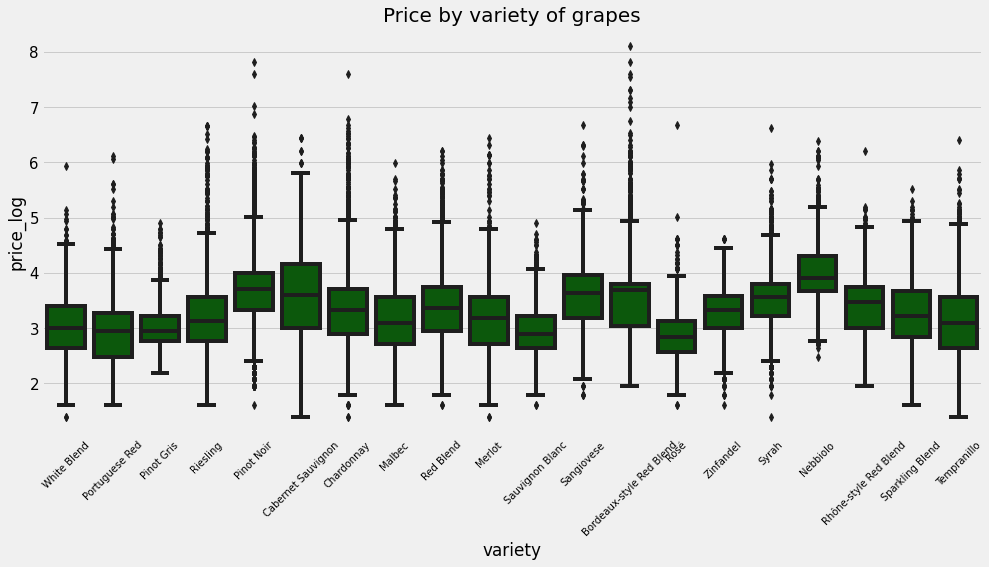

In [58]:
boxplot_chart(top_variety, 'variety', 'price_log', 'Price by variety of grapes')

**Nhận xét**

- Các loại nho Pinot Noir hay Bordeaux-style Red Blend, chardonnay là những loại nho thường được dùng để sản suất những loại rượu ở mức giá cao.

### Điểm đánh giá cho các rượu được làm từ trên 20 loại nho phổ biến nhất.

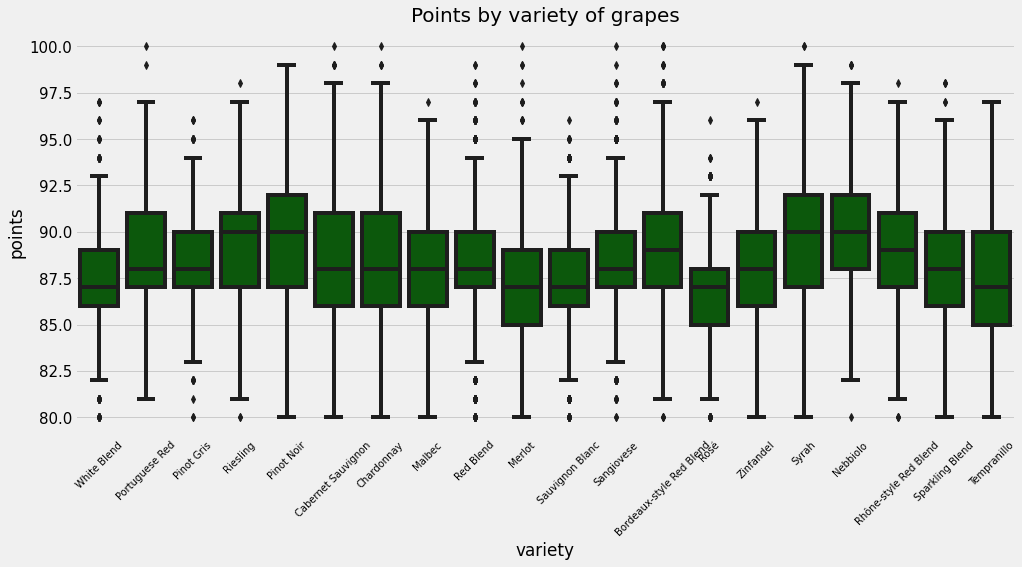

In [59]:
boxplot_chart(top_variety, 'variety', 'points', 'Points by variety of grapes')

**Nhận xét**

- Đa phần điểm số trung bình rượu được làm bởi mỗi loại nho thường nằm trong khoảng từ 85 - 93 điểm.
- Thật bất ngờ khi có vài loại nho sản xuất ra những chai rượu được đánh giá rất cao, nhưng cũng chính những loại nho này cũng sản xuất ra những chai rượu được đánh giá thấp, như: Merplot, Sangiovese, ...

**Nhận xét chung**

- Qua những phân tích về các loại Nho trên, chúng ta cũng thấy được các loại nho nổi tiếng dùng làm rượu, các quốc gia có thể trồng được và vùng mang đến giá trị cao, cũng như điểm số và giá trung bình ứng với mỗi loại khi được dùng làm rượu vang.

---

## 5.  Những tác giả nào có nhiều bài nhận xét, đánh giá nhất và khoảng điểm của họ cho trong bài nhận xét của mình.

Như ở trên, chúng ta đã cùng đi qua những yếu tố chính trong việc làm ra 1 loại rượu chất lượng. Những điểm số, bình luận về mỗi loại rượu của cho ta 1 cái nhìn chung về chất lượng rượu của mỗi vùng, mỗi loại. 

Những nhận xét và đánh giá trên cũng thể mang khuynh hướng cá nhân, lỡ lúc họ vui thì chấp loại rượu này cao, buồn thì cho điểm thấp. Hoặc có những người luôn cho điểm rất thấp, hoặc rất cao. Do đó chúng ta hãy cùng phân tích 1 số về những tác giả có nhiều bài đánh giá nhất và những điểm số mà họ cho.

**Trước hết chúng ta thấy chỉ có 19 tác giả tham gia nhận xét, đánh giá. Nên bắt đầu ta sẽ thống kê số lượng đánh giá, nhận xét của mỗi tác giả.**

In [60]:
df = wine_df[wine_df['taster_name']!='unknown']
print("Số lượng tác giả tham gia nhận xét và đánh giá: ", df['taster_name'].nunique())

Số lượng tác giả tham gia nhận xét và đánh giá:  19


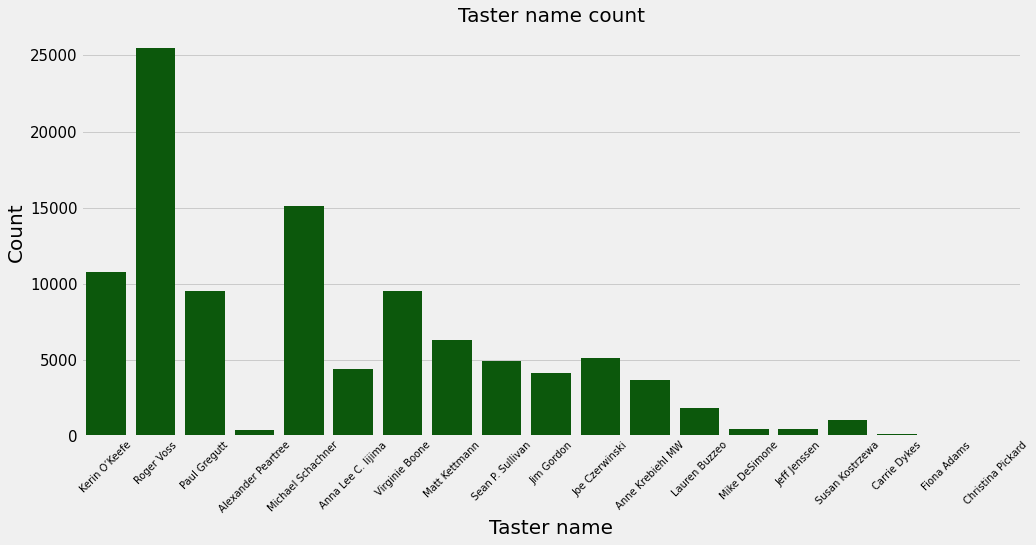

In [61]:
sns.countplot(x = 'taster_name', data = df, color = 'darkgreen')
plt.xlabel('Taster name', fontsize=20)
plt.ylabel('Count', fontsize = 20)
plt.xticks(rotation = 45, fontsize = 10)
plt.title('Taster name count', fontsize = 20)
plt.show()

### Khoảng điểm mà các tác giả dành cho các loại rượu mà mình đánh giá

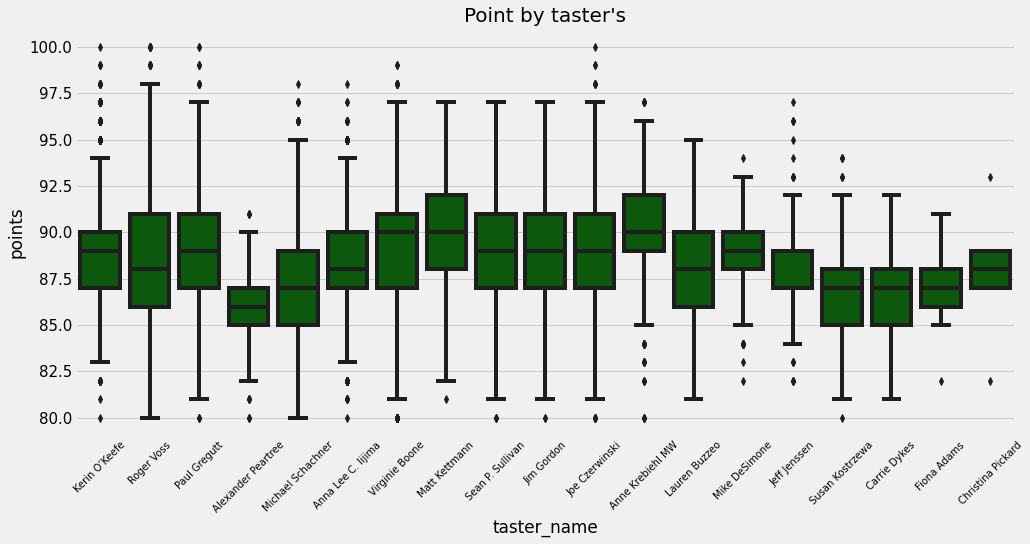

In [62]:
boxplot_chart( df['taster_name'].unique(), 'taster_name', 'points', "Point by taster's" )

**Nhận xét**

- Khoảng điểm mà các nhà đánh giá rượu thường cho nằm trong khoảng 85 - 92 điểm.


- Có nhiều tác giả đánh giá với khoảng điểm đánh giá rộng, từ 80-100. Họ đã từng đếm thử những loại rượu mà chỉ cho 80 điểm, và những loại rượu phải cho điểm 100 như Kerin O'Keefe, Roger Voss, ... Thể hiện những người này họ có cảm giác để đánh giá rượu là rất tốt chứ không phải chỉ cho điểm chung chung, mà có phân biệt được sự đặc biệt của mỗi loại.


- Cũng có vài nhà đánh giá rượu, đánh giá qua những loại rượu mà họ nếm thử và phần lớn cho số điểm thấp hơn mặt bằng chung như Alexander Peatree. ( Những người này khó tính thật ) 


### Tìm xem những nhà đánh giá rượu này thường thử những loại rượu có giá tiền như thế nào. 

- Đây cũng có thể 1 phần ảnh hưởng tới đánh giá của họ. Nếu có những nhà đánh giá chỉ thường thử những loại rượu cao cấp thì có thể luôn cho điểm cao.

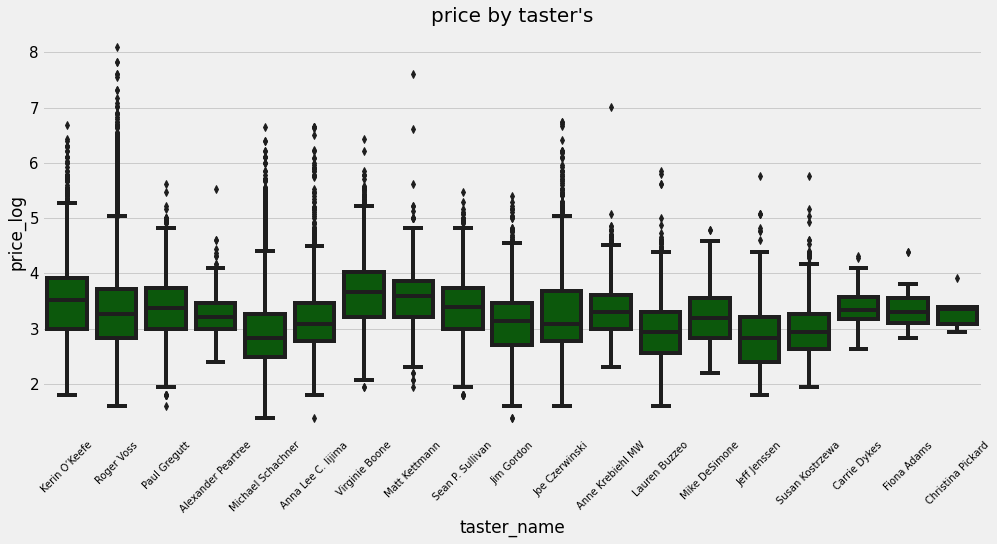

In [63]:
boxplot_chart( df['taster_name'].unique(), 'taster_name', 'price_log', "price by taster's" )

**Nhận xét**

- Như đã nhận xét trước đó do người đánh giá rượu Alexander Peatree ít uống những loại rượu giá cao nên cho điểm thấp cũng phải.

-  Roger Voss là nhà đánh giá rượu có cơ hội thưởng thức rượu ở nhiều mức giá nhất, từ vài chục đô đến hàng ngàn đô. Với khoảng điểm mà ông cho ở trên thể hiện mình là 1 nhà đánh giá rượu xuất sắc và từng trải. 

**Nhận xét chung**

- Ta thấy đa phần các nhà đánh giá cho điểm nằm trong khoảng 85-92. Thể hiện sự khách quan, và không bị ảnh hưởng bởi tiếng tăm và mức giá của loại rượu mà họ nếm thử.

---

## 6. Độ tuổi của rượu có ảnh hưởng như thế nào đến giá của rượu không?

Sau những phân tích trên, ta sẽ đi trả lời 1 câu hỏi thú vị - đó là độ tuổi có ảnh hưởng đến giá rượu hay không. 

Trước đó theo kiến thức mình thấy trên báo và tìm hiểu trên mạng thì những chai rượu có tuổi đời cao thường đắt tiền vì:

- Những chai rượu vang lâu năm đắt tiền vì tính quý hiếm và được bảo quản 1 cách kĩ càng.
- Rượu khi uống sẽ có mùi thơm rất hấp dẫn. Khi uống, rượu rất mềm, không có cảm giác gắt ở lưỡi và họng. Hàm lượng độc tố trong rượu cũng được giảm đi cực kỳ nhiều vì theo thời gian, độc tố đã được loại bỏ. Uống loại rượu lâu năm không chỉ thơm ngon mà còn cực kỳ an toàn cho sức khỏe. Đây cũng chính là lý do vì sao rượu để càng lâu càng ngon và càng đắt.

**

Để trả lời cho câu hỏi này, ta phải tìm được làm 2 nhiệm vụ

- Tìm và tính năm sản xuất của rượu và sau đó dựa vào năm sản suất để tính tuổi age. Vậy năm sản xuất của rượu nằm ở đâu?. 


- Với thuộc tính age mới được tạo, ta thống kê số mẫu của ứng mỗi độ tuổi.


- Vẽ biểu đồ scatter để thể hiện mối quan hệ giữa biến price và age.


### Tiền xử lí: tìm năm sản xuất và tính tuổi của mỗi loại rượu

Nếu để ý kĩ, ta sẽ thấy năm sản xuất nằm trong thuộc tính title. Nhưng trong phần title có thể xuất hiện các giá trị số mà đó không phải là năm sản suất như ví dụ sau, giá trị 1789 là trong tên '1789 Wines' - 1 nhà sản xuất rượu. Và ở đây năm sản suất là 2007.

In [64]:
wine_df.iloc[68586, 8:11]

title      1789 Wines 2007 Pinot Noir (Chehalem Mountains)
variety                                         Pinot Noir
winery                                          1789 Wines
Name: 68586, dtype: object

- Hoặc trong những mẫu dưới thì `title` thì năm là 2014, 2013, 2012, 2011. Còn số 1105 là 1 phần của tên loại rượu, và như mình nói ở trên thì những loại rượu có thể phân biệt bởi năm sản suất.

In [65]:
wine_df[wine_df['title'].str.contains('1105', '2014')]

,country,description,points,price,province,region_1,region_2,taster_name,title,variety,winery,provinceOfCountry,price_log
213,US,"This blend of 60% Petite Sirah, 21% Syrah, 7% ...",90,48.0,California,Paso Robles,Central Coast,Matt Kettmann,MCV 2014 1105 Red (Paso Robles),Red Blend,MCV,( US ) California,3.871201
32788,US,"Deep, dark blueberry fruit meets with beef cha...",90,48.0,California,Paso Robles,Central Coast,Matt Kettmann,MCV 2013 1105 Red (Paso Robles),Red Blend,MCV,( US ) California,3.871201
88344,US,"Based on Petite Sirah, with small amounts of S...",90,36.0,California,Paso Robles,Central Coast,unknown,MCV 2011 1105 Red (Paso Robles),Red Blend,MCV,( US ) California,3.583519
119717,US,"This Petite Sirah-led blend, which also featur...",88,40.0,California,Paso Robles,Central Coast,Matt Kettmann,MCV 2012 1105 Red (Paso Robles),Red Blend,MCV,( US ) California,3.688879


- Hoặc có những mẫu, trong title không chứa giá trị số

In [66]:
wine_df.iloc[63, 8:11]

title      Roland Champion NV Brut Rosé  (Champagne)
variety                              Champagne Blend
winery                               Roland Champion
Name: 63, dtype: object

**Vậy ta sẽ tiến hành các bước xử lí sau:**

- Bước 1: Lấy được mảng các giá trị số có 4 chữ số trong phần `title` và đặt tên là **number_in_title**.
- Bước 2: Lấy mảng các giá trị số nếu có xuất hiện trong `winery` và đặt tên là **number_in_winery** .
- Bước 3: 
    + Giữ lại các giá trị có trong title nhưng không có trong winery
    + Nếu number_in_title chứa nhiều hơn 2 giá trị, mặc định lấy giá trị lớn nhất mà hợp lệ (nhỏ hơn năm 2020 - tại có nhiều giá trị rất lớn ).
    + Điền các giá trị rỗng bằng năm sản suất của mẫu liền trên.
    
- Bước 4: Loại bỏ các giá trị sai.

**Bước 1 và 2** 

In [67]:
number_in_title = wine_df['title'].apply(lambda x: re.findall(r'\d{4}', x))
number_in_winery = wine_df['winery'].apply(lambda x: re.findall(r'\d{4}', x))

**Bước 3**

In [68]:
act_year = [list(set(number_in_title[i]) - set(number_in_winery[i])) if number_in_winery[i]!=None
                                                                     else number_in_title[i] for i in range(num_rows)]

In [69]:
year_generate = []
for idx, v in enumerate(act_year):
    if len(v)==1:
        year_generate.append(v[0])
        continue
    if len(v)>1:
        arr = []
        for y in v:
            if y<='2020':
                arr.append(y)
        year_generate.append(max(arr))
        continue
    if len(v)==0:
        year_generate.append(year_generate[idx-1])

In [70]:
# Và bây giờ ta đã có được năm sản suất của rượu.
wine_df = wine_df.assign(year = year_generate)
# Ép kiểu về int
wine_df['year'] = wine_df['year'].astype(int)

In [71]:
print('Năm sản xuất gần nhất: ', wine_df['year'].max())

Năm sản xuất gần nhất:  2017


**Bước 4**

In [72]:
print("Tổng số mẫu Null của thuộc tính year: ", wine_df['year'].isnull().sum())
print("\nMiền giá trị trong year: ",  wine_df['year'].unique())

Tổng số mẫu Null của thuộc tính year:  0

Miền giá trị trong year:  [2013 2011 2012 2010 2007 2009 2008 2014 2015 2016 2004 2003 2006 2001
 2005 2002 1887 2000 1999 1991 1997 1996 2017 1995 1872 1998 1994 1992
 1976 1964 1983 1967 1990 1988 1827 1980 1987 1989 1993 1969 1882 1935
 1503 1821 1973 1978 1965 1968 1947 1963 1985 1927 1904 1868 1847 1982
 1986 1607 1919 1957 1966 1984 1961 1952 1941 1974 1934 1945]


- Sau bước chuẩn hóa: thì vẫn còn vài mẫu mình nghĩ mang giá trị không đúng, có thể giá trị ở đây không phải năm sản suất mà là tên loại rượu thôi. Nên ta sẽ xóa đi những mẫu này.

In [73]:
wine_df[wine_df['title'].str.contains(r'1607|1503')]

,country,description,points,price,province,region_1,region_2,taster_name,title,variety,winery,provinceOfCountry,price_log,year
41914,England,Aromatic overtones of meadow flowers with just...,89,51.681159,England,unknown,unknown,Anne Krebiehl MW,Hush Heath Estate NV Balfour 1503 Classic Cuvé...,Sparkling Blend,Hush Heath Estate,( England ) England,3.945093,1503
71238,Italy,"Lively and fresh, this off-dry wine doles out ...",87,17.000000,Veneto,Prosecco,unknown,Kerin O’Keefe,Albino Armani NV 1607 Extra Dry (Prosecco),Glera,Albino Armani,( Italy ) Veneto,2.833213,1607


In [74]:
wine_df = wine_df[~((wine_df['year']==1503) | (wine_df['year']==1607))]

- Ta đã có được năm sản xuất, giờ ta sẽ tính tuổi của rượu bằng cách 1 mốc thời gian - năm sản xuất. Ở đây mình chọn mốc thời gian là năm 2019 ( Không nên lấy năm lớn nhất trong thuộc tính year làm mốc, vì đó là năm sản xuất, mà rượu thường qua thời gian ủ ít nhất là từ 1-2 nằm mới đưa ra tiêu thụ ). 

In [75]:
#Tạo thuộc tính age
wine_df = wine_df.assign(age = wine_df['year'].apply(lambda x: 2019 - x ))

# Thống kê biến age
wine_df['age'].describe()

count    129968.000000
mean          8.345531
std           4.098573
min           2.000000
25%           6.000000
50%           8.000000
75%          10.000000
max         198.000000
Name: age, dtype: float64

### Với thuộc tính age mới được tạo, ta thống kê số mẫu theo mỗi độ tuổi

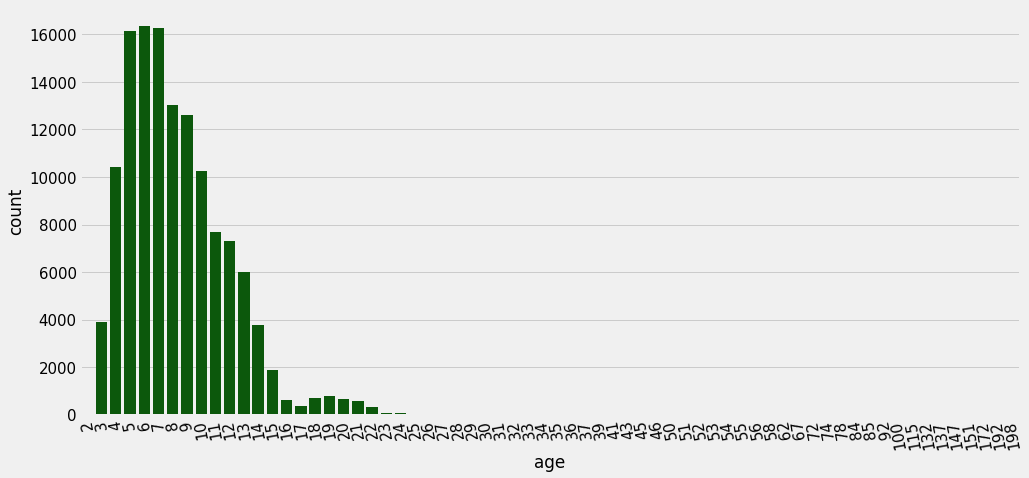

In [76]:
plot = sns.countplot(x = 'age', data=wine_df, color = 'darkgreen')
plot.set_xticklabels(plot.get_xticklabels(), rotation = 100)
plt.show()

**Nhận xét**

- Ta thấy phần lớn rượu được đánh giá có độ tuổi từ 4-16 tuổi và vài chai rượu có độ tuổi cao hơn 1 chút là từ 18 - 25 tuổi.

### Trực quan bằng biểu đồ scatter plot để thể hiện mối quan hệ giữa biến price và age

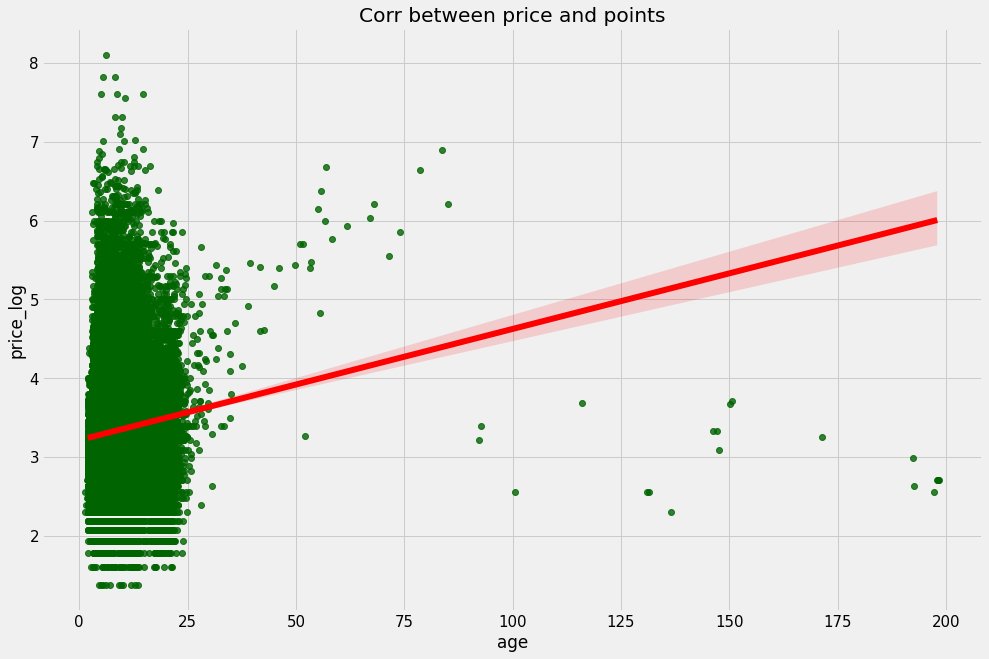

In [77]:
plt.figure(figsize = (15, 10))
plot = sns.regplot(x = 'age', y = 'price_log', data = wine_df, line_kws={'color':'red'}, 
                  x_jitter=True, fit_reg=True, color='darkgreen')
plot.set_title("Corr between price and points")
plt.show()

**Nhận xét**

- Với những chai rượu từ 80 tuổi trở lại. Thì với độ tuổi rượu càng cao thì giá càng cao. Đúng như chúng ta nhận định ban đầu rồi.

- Với những chai rượu từ 100 tuổi trở lên. Mình cũng hơi lo không biết đó thực sự phải là tuổi của rượu không hay là 1 kiểu tên rượu - nên mình sẽ không nhận xét về phần này.

# Nhìn nhận và đánh giá quá trình làm đồ án

## Những khó khăn đã gặp phải

Trong quá trình làm đồ án thì em gặp phải những khó khăn sau:

+ Quá trình tìm kiếm dữ liệu phù hợp, đủ thông tin để mình khám phá, có thể có những bước tiền xử lí và đặt câu hỏi dựa trên dữ liệu không quá đơn giản.
+ Có một vài tập dữ liệu mà mình cũng không thật sự hiểu hết ý nghĩa của các thuộc tính. Như trong tập dữ liệu này, mình vẫn chưa hiểu về thuộc tính designation.
+ Không đủ thời gian để có thể tìm kiếm thông tin, hiểu về lĩnh vực rượu.

## Những điều học được hữu ích

Trong quá trình làm thì em cũng học được nhiều thứ:

- Cách để chủ động tìm kiếm, nhìn nhận về các tập dữ liệu thỏa yêu cầu mình đặt ra.
- Học được cách tổ chức cấu trúc file, các quy trình trong 1 bài phân tích, khám phá dữ liệu.
- Áp dụng và thành thạo hơn các thư viện hỗ trợ, kĩ thuật tiền xử lí, trực quan hóa, tìm kiếm thông tin từ dữ liệu đã học được trên lớp.
- Ứng dụng được các cách tổ chức source code trên github, cập nhật phiên bản.

## Nếu có thêm thời gian

- Tìm hiểu về lĩnh vực thuộc tập dữ liệu của mình, cụ thể ở đây là rượu. Để có thể hiểu hơn về các biến, trong đó có biến designation. Từ đó có thể mong muốn biết được thêm nhiều thông tin hơn nữa từ dữ liệu.
- Phân tích thêm câu 7, về các bình luận, các từ ngữ được dùng và ảnh hưởng như thế nào đến việc cho điểm.

---

# Tài liệu Tham khảo


https://winemart.vn/cac-giong-nho-lam-ruou-vang/

https://khoruou.vn/top-3-vung-trong-nho-noi-tieng-nhat-the-gioi-hien-nay-newsid1155.html

https://meta.vn/hotro/tuoi-tho-cua-ruou-vang-quyet-dinh-nhu-the-nao-den-chat-luong-ruou-2119

http://ruoutruongsinhgialai.com/tin-tuc/29/230/vi-sao-ruou-de-cang-lau-cang-ngon.

https://www.kaggle.com/kabure/wine-review-s-eda-recommend-systems


---

 <font color = 'blue' size = "20" > Cảm ơn đã theo dõi tới cuối bài </font>